# TIME-SERIES ANALYSIS ON AIRPASSENGER DATASET

In [14]:
import pandas as pd
A=pd.read_csv("C:/Users/Neha/Downloads/PythonNotes/AirPassengers.csv")

In [15]:
A.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [16]:
A=A.rename(columns={'#Passengers':'Passengers','Month':'Year'})

In [17]:
A.head()

,Year,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [19]:
#to convert into correct data format
A.year=pd.to_datetime(A.Year,format="%Y-%m")

<ipython-input-19-3dcd6d9770ff>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  A.year=pd.to_datetime(A.Year,format="%Y-%m")


In [20]:
A.index=A.year#time should not be a specific column,it should be an index

In [21]:
A.head()

,Year,Passengers
Year,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121


In [22]:
A=A.drop(labels=['Year'],axis=1)

In [23]:
A.head()

,Passengers
Year,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Visualise Original Time-Series

Text(0, 0.5, 'No. of Passengers')

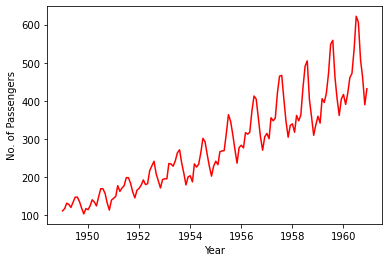

In [24]:
import matplotlib.pyplot as plt
#Visualise the airpassenger dataset
plt.plot(A,c='red')
plt.xlabel('Year')
plt.ylabel('No. of Passengers')

Air passengers data from 1949 to 1961 show significant upward growth of passengers.

# To visualise the components of time-series

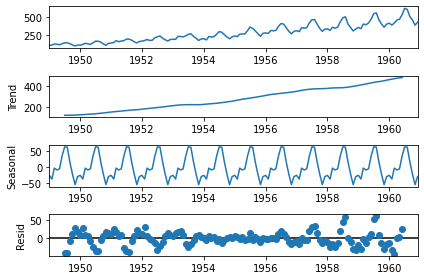

In [25]:
from statsmodels.api import tsa
tsa.seasonal_decompose(A).plot()
plt.show()

# Standardization of Time-Series

In [27]:
#standartisation using Log
import numpy as np
LOGGED_DF=pd.DataFrame(np.log(A['Passengers']))

Text(0, 0.5, 'No. of passengers')

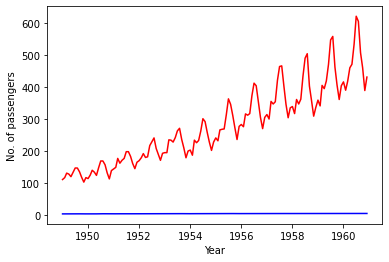

In [28]:
#Comparing original time-series and Standardise time-series
plt.plot(A,c='red')
plt.plot(LOGGED_DF,c='blue')
plt.xlabel("Year")
plt.ylabel('No. of passengers')

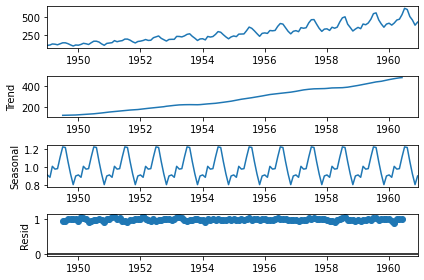

In [30]:
#Decompose Time-Series based on seasons
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
fig = seasonal_decompose(A,model="multiplicative")
fig.plot()
plt.show()

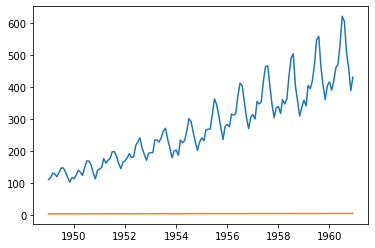

In [31]:
plt.plot(A)
plt.plot(LOGGED_DF)

# To check whether data has been converted to stationary using rolling mean

# Comparing original time-series rolling mean and standardise rolling mean

In [33]:
rm=A.rolling(window=12).mean()
rstd=A.rolling(window=12).std()

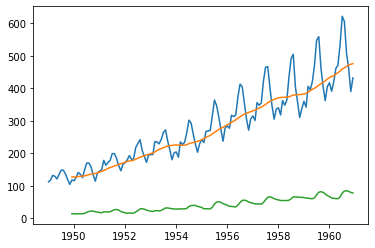

In [34]:
plt.plot(A)
plt.plot(rm)
plt.plot(rstd)

In [35]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [37]:
#Improving rolling mean using better standardisation than log that is Z-score
STD_DF=pd.DataFrame(ss.fit_transform(A[['Passengers']]),columns=['Passengers'],index=A.index)


In [38]:
rm=STD_DF.rolling(window=12).mean()
rstds=STD_DF.rolling(window=12).std()

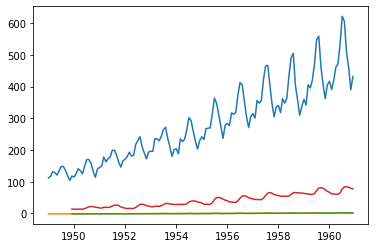

In [39]:
plt.plot(A)
plt.plot(STD_DF)
plt.plot(rm)
plt.plot(rstd)

In [40]:
#Numeric way of testing using p-value
from statsmodels.tsa import adfvalues

In [42]:
from statsmodels.tsa.stattools import adfuller
adfuller(A['Passengers'])[1]

0.9918802434376409

In [44]:
from statsmodels.tsa.stattools import adfuller
adfuller(LOGGED_DF['Passengers'])[1]

0.4223667747703857

In [45]:
from statsmodels.tsa.stattools import adfuller
adfuller(STD_DF['Passengers'])[1]

0.9918802434376411

In [47]:
#Difference of log and mean
rm=A.rolling(window=12).mean()
W=np.log(A)-rm
W=W[W['Passengers'].isna()!=True]#To remove null values

In [49]:
from statsmodels.tsa.stattools import adfuller
adfuller(W['Passengers'])[1]

0.9921114303164102

According to adfuller test none of standardization are stationary

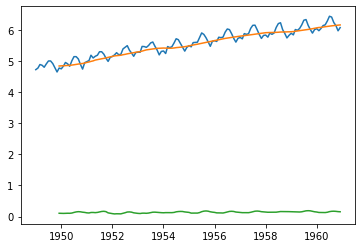

In [52]:
import numpy as np
Alog = np.log(A)

rm = Alog.rolling(window=12).mean() #rolling mean
rstd = Alog.rolling(window=12).std() #rolling standard deviatation

plt.plot(Alog)
plt.plot(rm)
plt.plot(rstd)

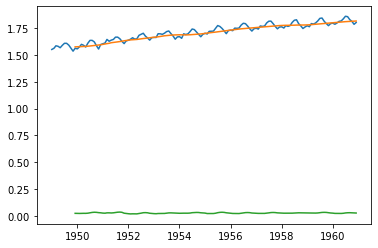

In [53]:
import numpy as np
Alog = np.log(np.log(A))

rm = Alog.rolling(window=12).mean() #rolling mean
rstd = Alog.rolling(window=12).std() #rolling standard deviatation

plt.plot(Alog)
plt.plot(rm)
plt.plot(rstd)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaledA = pd.DataFrame(ss.fit_transform(A),index=A.index,columns=A.columns)

rm = scaledA.rolling(window=12).mean() #rolling mean
rstd = scaledA.rolling(window=12).std() #rolling standard deviatation


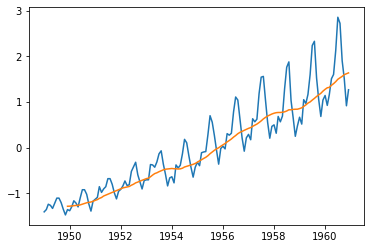

In [56]:
plt.plot(scaledA)
plt.plot(rm)
#plt.plot(rstd)

In [58]:
from statsmodels.tsa.stattools import adfuller
q = adfuller(Alog.Passengers)
pval = q[1]
pval


0.22258989117061467

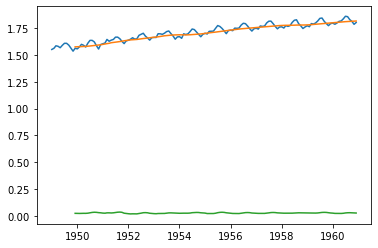

In [59]:
import numpy as np
Alog = np.log(np.log(A))

rm = Alog.rolling(window=12).mean() #rolling mean
rstd = Alog.rolling(window=12).std() #rolling standard deviatation


plt.plot(Alog)
plt.plot(rm)
plt.plot(rstd)

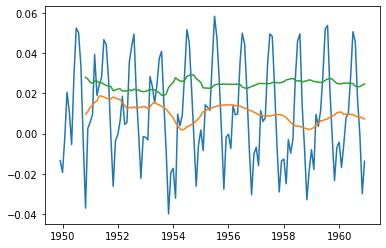

In [61]:
q = Alog-rm

import numpy as np


rm = q.rolling(window=12).mean() #rolling mean
rstd = q.rolling(window=12).std() #rolling standard deviatation


plt.plot(q)
plt.plot(rm)
plt.plot(rstd)

# Forecasting using AR Model

In [62]:
trd = A[A.index.year<=1958]
tsd = A[A.index.year>1958]

In [63]:
trd

,Passengers
Year,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1958-08-01,505
1958-09-01,404
1958-10-01,359


In [64]:
tsd

,Passengers
Year,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420
1959-06-01,472
1959-07-01,548
1959-08-01,559
1959-09-01,463


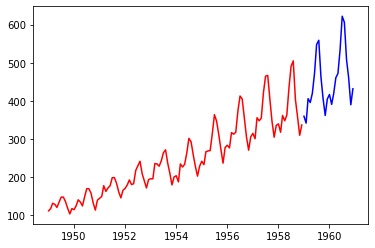

In [65]:
plt.plot(trd,c="red")
plt.plot(tsd,c="blue")

In [66]:
from statsmodels.tsa.ar_model import AR
model = AR(trd).fit()
pred = model.predict(start="1959-01-01",end="1960-12-01")
tsd['Forecasted_from_AR']=pred

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
C:\

In [67]:
from sklearn.metrics import mean_squared_error
print("MSE = %.2f"%mean_squared_error(tsd.Passengers,tsd.Forecasted_from_AR))

MSE = 1814.01


In [68]:
tsd

,Passengers,Forecasted_from_AR
Year,,
1959-01-01,360,346.387361
1959-02-01,342,320.446670
1959-03-01,406,370.614512
1959-04-01,396,350.715553
1959-05-01,420,381.196946
1959-06-01,472,464.228410
1959-07-01,548,530.961303
1959-08-01,559,546.633624
1959-09-01,463,433.801565
